In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys 
import nltk
import ssl


Primero se importan todas las librerías que nos puedan ser útiles en la tarea a realizar

In [3]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Después se importan funciones que nos serán útiles, por ejemplo las que hablan de sentimientos

In [4]:
wines=pd.read_csv("D:/Documentoss/Carlos/trabajos de la compu gris/Tareas de facultad/Semestre 7/mineria datos/wine/winemag-data_first150k.csv")
wines

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Ahora procedemos a descargar la base de datos y ver la info. que contiene

In [5]:
wines2=wines.rename(columns = {'Unnamed: 0':'ID'})
wines2

,ID,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [6]:
wines3=wines2.drop({'ID','designation','province','region_1','region_2','winery','points','price'},axis=1)
wines3


,country,description,variety
0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,White Blend
150926,France,"Offers an intriguing nose with ginger, lime an...",Champagne Blend
150927,Italy,This classic example comes from a cru vineyard...,White Blend
150928,France,"A perfect salmon shade, with scents of peaches...",Champagne Blend


En los dos bloques anteriores se le hacen pequeñas modificaciones a la base de datos y se eliminan las columnas que no nos van a servir, para esta actividad utilizaremos país de origen, descripción y tipo de vino

In [7]:
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

wines3.head(3)

,country,description,variety
0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc


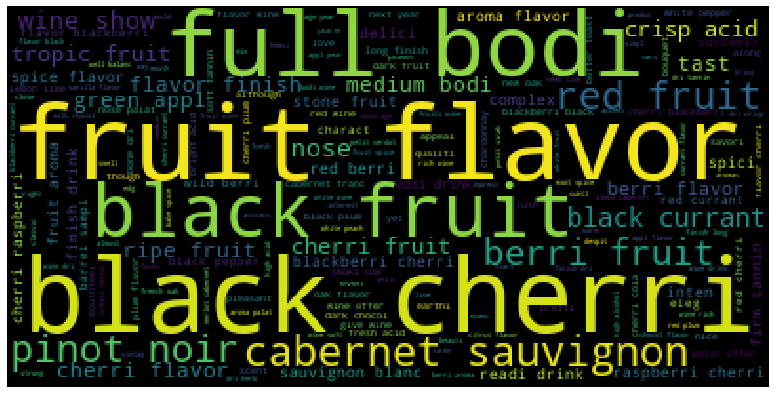

In [8]:
wines3.columns = [ 'country','description', 'variety']
n = len(wines3)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = wines3.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
wines3['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

Aquí se revisan las palabras más comunes en la base de datos que tenemos

In [9]:
wines3.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

En este bloque utilizamos la función unique para ver los países con los que se puede hacer el análisis.
Para continuar escogemos Estados Unidos, México, Argentina, Alemania, Francia y España

In [10]:
encabezado=['country','description','variety']
archivo=wines3[wines3['country']=='US']
archivo.to_csv('winesUS.csv',columns=encabezado,index=False)

USwines=pd.read_csv('winesUS.csv')
USwines.head(10)


,country,description,variety
0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
2,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
3,US,This re-named vineyard was formerly bottled as...,Pinot Noir
4,US,The producer sources from two blocks of the vi...,Pinot Noir
5,US,"From 18-year-old vines, this supple well-balan...",Pinot Noir
6,US,A standout even in this terrific lineup of 201...,Pinot Noir
7,US,"With its sophisticated mix of mineral, acid an...",Pinot Noir
8,US,"First made in 2006, this succulent luscious Ch...",Chardonnay
9,US,"This blockbuster, powerhouse of a wine suggest...",Cabernet Sauvignon


In [11]:
encabezado=['country','description','variety']
archivo=wines3[wines3['country']=='Mexico']
archivo.to_csv('winesMX.csv',columns=encabezado,index=False)

MXwines=pd.read_csv('winesMX.csv')
MXwines.head(10)


,country,description,variety
0,Mexico,"Initially hard, rooty aromas of leather and ho...",Cabernet Sauvignon
1,Mexico,"While this wine is unoaked, it still carries a...",Chardonnay
2,Mexico,"Mocha, coffee, leather, brandied red fruit and...",Cabernet Sauvignon
3,Mexico,"This fiery Grenache delivers heat, bold fruit ...",Grenache
4,Mexico,"Hot, syrupy aromas are rooty and intense. This...",Nebbiolo
5,Mexico,"This is a blend of Chardonnay, Sauvignon Blanc...",White Blend
6,Mexico,Flat early aromas seem smoky at first and then...,Sauvignon Blanc
7,Mexico,"This is a muscular, concentrated wine with no ...",Shiraz
8,Mexico,This opens with hard-capped aromas of crusty m...,Nebbiolo
9,Mexico,Mild hints of tropical fruit are less than con...,Sauvignon Blanc


In [12]:
encabezado=['country','description','variety']
archivo=wines3[wines3['country']=='Argentina']
archivo.to_csv('winesAR.csv',columns=encabezado,index=False)

ARwines=pd.read_csv('winesAR.csv')
ARwines.head(10)


,country,description,variety
0,Argentina,"Concentrated, ripe blackberry and cassis aroma...",Malbec
1,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Malbec
2,Argentina,This copper-tinted rosé of Pinot Noir smells l...,Rosé
3,Argentina,"Aromas of prune, raisin and black plum are ful...",Malbec
4,Argentina,"Dark, minty, inky aromas of blackberry are rug...",Bordeaux-style Red Blend
5,Argentina,Dark-berry aromas are crisp and show a note of...,Malbec
6,Argentina,"Immediately this smells raisiny, but with time...",Cabernet Sauvignon
7,Argentina,"Open-grain oak aromas are out front, followed ...",Cabernet Sauvignon
8,Argentina,Although this San Juan SB offers almost nothin...,Sauvignon Blanc
9,Argentina,This boxed Malbec is burgundy-colored and open...,Malbec


In [13]:
encabezado=['country','description','variety']
archivo=wines3[wines3['country']=='Spain']
archivo.to_csv('winesSP.csv',columns=encabezado,index=False)

SPwines=pd.read_csv('winesSP.csv')
SPwines.head(10)


,country,description,variety
0,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
1,Spain,"Deep, dense and pure from the opening bell, th...",Tinta de Toro
2,Spain,Slightly gritty black-fruit aromas include a s...,Tinta de Toro
3,Spain,Lush cedary black-fruit aromas are luxe and of...,Tinta de Toro
4,Spain,"Nicely oaked blackberry, licorice, vanilla and...",Tempranillo
5,Spain,"Alluring, complex and powerful aromas of grill...",Tempranillo Blend
6,Spain,Tarry blackberry and cheesy oak aromas are app...,Tinta de Toro
7,Spain,Earthy plum and cherry aromas score points for...,Mencía
8,Spain,This comes across wide and expansive as it laz...,Palomino
9,Spain,Aromas of brandied cherry and crème de cassis ...,Monastrell


In [14]:
encabezado=['country','description','variety']
archivo=wines3[wines3['country']=='France']
archivo.to_csv('winesFR.csv',columns=encabezado,index=False)

FRwines=pd.read_csv('winesFR.csv')
FRwines.head(10)


,country,description,variety
0,France,"This is the top wine from La Bégude, named aft...",Provence red blend
1,France,This wine is in peak condition. The tannins an...,Tannat
2,France,Coming from a seven-acre vineyard named after ...,Malbec
3,France,"Pale in color, this is nutty in character, wit...",Sparkling Blend
4,France,Gingery spice notes accent fresh pear and melo...,Rhône-style White Blend
5,France,"Dark in color and in flavor profile, this medi...",Syrah
6,France,"This structured, complex Chardonnay is packed ...",Chardonnay
7,France,"This ripe, full-bodied wine has ripe green fru...",Sauvignon Blanc
8,France,"With its light color and cool feel, this well-...",Pinot Noir
9,France,"Delicious while also young and textured, this ...",Sauvignon Blanc


In [15]:
encabezado=['country','description','variety']
archivo=wines3[wines3['country']=='Germany']
archivo.to_csv('winesGR.csv',columns=encabezado,index=False)

GRwines=pd.read_csv('winesGR.csv')
GRwines.head(10)


,country,description,variety
0,Germany,"Juicy, sun-kissed grapefruits and apple blosso...",Riesling
1,Germany,"Often herbal and a bit green in nature, Silvan...",Silvaner
2,Germany,Ruddy black plums and blackberries scent this ...,Lemberger
3,Germany,"Apple, pear and stone-fruit flavors are vibran...",Riesling
4,Germany,"Quite rare in the U.S. market, this ripe richl...",Früburgunder
5,Germany,Pressed apple and pears seem to be dusted in p...,Riesling
6,Germany,"Kirsten's Feinherb, or gently sweet bottling, ...",Riesling
7,Germany,Luscious white peach and apricot flavors are a...,Riesling
8,Germany,"Apple, pear and stone-fruit flavors are vibran...",Riesling
9,Germany,"Whiffs of spice, honeycomb and lanolin meld cu...",Riesling


En esta parte guardamos en un csv la información de los países y la leemos en un nuevo dataframe

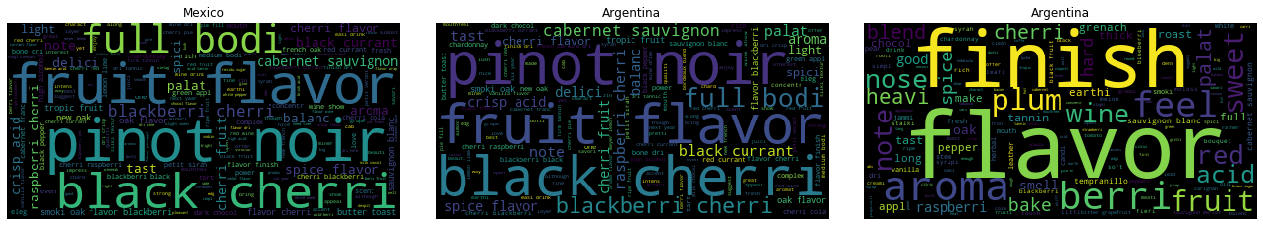

In [16]:
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dUS = pd.read_csv("winesUS.csv", header = None)
dMX = pd.read_csv("winesMX.csv", header = None)
dAR = pd.read_csv("winesAR.csv", header = None)
cols = [ 'country','description', 'variety']
dUS.columns = cols
dMX.columns = cols
dAR.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["USA", "Mexico", "Argentina"]
i = 1
for d in [dUS, dMX, dAR]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

En este bloque encontramos las palabras más frecuentes en la descripción de los vinos de cada país de américa

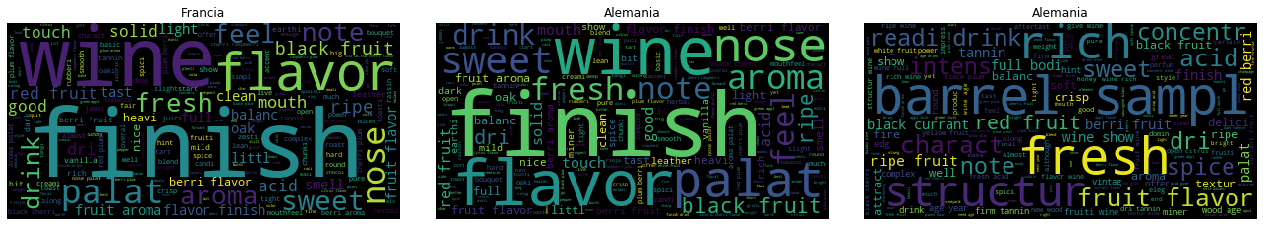

In [17]:
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dFR = pd.read_csv("winesFR.csv", header = None)
dSP = pd.read_csv("winesSP.csv", header = None)
dGR=pd.read_csv("winesGR.csv",header=None)
cols = [ 'country','description', 'variety']
dFR.columns = cols
dSP.columns = cols
dGR.columns=cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["España", "Francia", "Alemania"]
i = 1
for d in [dSP, dFR, dGR]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

En este bloque podemos ver las descripciones más comunes en los vinos originarios de los países europeos que se escogieron.